<a href="https://colab.research.google.com/github/Tawheed-DS/EDA-With-Network-Data/blob/main/EDA_on_network_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Data files/cs448b_ipasn.csv'
data = pd.read_csv(path)

In [ ]:
data.shape

(20803, 4)

In [ ]:
data.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    20803 non-null  object
 1   l_ipn   20803 non-null  int64 
 2   r_asn   20803 non-null  int64 
 3   f       20803 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 650.2+ KB


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    20803 non-null  datetime64[ns]
 1   l_ipn   20803 non-null  int64         
 2   r_asn   20803 non-null  int64         
 3   f       20803 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 650.2 KB


In [ ]:
# Number of unique days data belongs to
data.date.nunique()

92

In [ ]:
data.l_ipn.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
data.r_asn.nunique()

2005

In [ ]:
data.f.describe()

count     20803.000000
mean         93.914243
std        5764.995269
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max      784234.000000
Name: f, dtype: float64

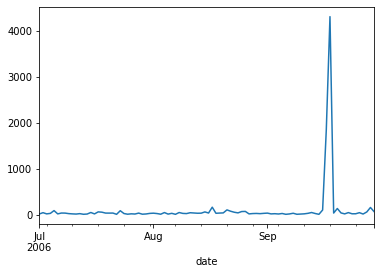

In [ ]:
# Plot average count of connections on different dates
data.groupby('date')['f'].mean().plot()

In [ ]:
# Check the dates for this surge in connections
data.groupby('date')['f'].mean().sort_values(ascending=False)

date
2006-09-18    4307.633880
2006-09-17    1849.846667
2006-08-17     170.571429
2006-09-29     164.162338
2006-09-20     141.651584
                 ...     
2006-07-13      16.754464
2006-09-06      15.974619
2006-09-15      15.930233
2006-07-22      15.838710
2006-08-07      15.760274
Name: f, Length: 92, dtype: float64

In [ ]:
# Identify the ip address for september 18
data[data['date']=='2006-09-18'].sort_values(by='f',ascending = False).head()

,date,l_ipn,r_asn,f
18392,2006-09-18,4,3671,784234
18391,2006-09-18,4,3265,548
18351,2006-09-18,2,1239,542
18305,2006-09-18,0,1239,541
18468,2006-09-18,8,15169,372


In [ ]:
# Identify the ip address for september 17
data[data['date']=='2006-09-17'].sort_values(by='f',ascending = False).head()

,date,l_ipn,r_asn,f
18237,2006-09-17,4,3671,274011
18236,2006-09-17,4,3265,646
18170,2006-09-17,0,9370,471
18202,2006-09-17,2,9370,421
18293,2006-09-17,8,6517,235


####Clearly there is an extreme surge in the count of connections on 17th and 18th september on ip address 4

#####**Hence we have successfully identified why reports of suspicous activity was triggered on 18-09-2006 for ip address 4**

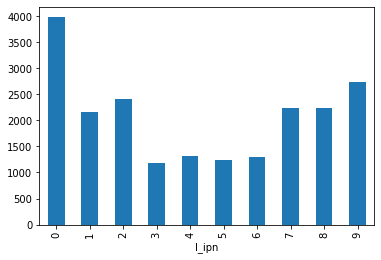

In [ ]:
data.groupby(['l_ipn'])['r_asn'].count().plot(kind='bar')

In [ ]:
data.groupby(['date','l_ipn'])['l_ipn'].count().sort_values(ascending=False)

date        l_ipn
2006-07-21  9        96
2006-08-02  9        94
2006-07-25  9        85
2006-08-11  8        85
2006-09-30  8        84
                     ..
2006-09-07  9         2
2006-07-02  9         2
2006-07-14  9         2
2006-08-20  9         2
2006-09-27  6         1
Name: l_ipn, Length: 847, dtype: int64

In [ ]:
target_months = data[(data['date'] > '2006-08-01') & (data['date'] < '2006-09-30')]

In [ ]:
tar[target_months['f'] == 0]

count     12667.000000
mean        129.703324
std        7385.793568
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max      784234.000000
Name: f, dtype: float64

In [ ]:
data[data['date']=='2006-08-24'].sort_values(by='f',ascending=False)

,date,l_ipn,r_asn,f
13322,2006-08-24,1,3307,2044
13345,2006-08-24,1,33438,1663
13320,2006-08-24,1,2108,1660
13501,2006-08-24,8,32632,989
13519,2006-08-24,9,15169,893
...,...,...,...,...
13346,2006-08-24,1,37945,1
13344,2006-08-24,1,21844,1
13338,2006-08-24,1,9908,1
13326,2006-08-24,1,4323,1


In [ ]:
target_months.groupby(['date','r_asn'])['l_ipn'].count().sort_values(ascending=False)

date        r_asn
2006-08-02  1239     9
2006-08-23  3269     9
2006-08-06  7497     9
2006-08-05  7497     9
2006-08-10  17184    9
                    ..
2006-09-06  17620    1
            17621    1
            17896    1
            17964    1
2006-08-02  3        1
Name: l_ipn, Length: 8097, dtype: int64

In [ ]:
target_months.groupby('date')['f'].mean()

date
2006-08-02      32.322581
2006-08-03      18.166667
2006-08-04      53.891304
2006-08-05      20.655814
2006-08-06      36.950249
2006-08-07      15.760274
2006-08-08      54.450644
2006-08-09      35.662069
2006-08-10      31.692063
2006-08-11      49.955882
2006-08-12      44.537190
2006-08-13      39.184713
2006-08-14      40.810680
2006-08-15      67.727273
2006-08-16      43.895307
2006-08-17     170.571429
2006-08-18      38.465608
2006-08-19      42.877273
2006-08-20      46.600840
2006-08-21     112.080000
2006-08-22      82.725979
2006-08-23      60.592334
2006-08-24      47.080972
2006-08-25      75.846154
2006-08-26      78.625000
2006-08-27      24.926554
2006-08-28      32.250000
2006-08-29      34.791096
2006-08-30      30.170404
2006-08-31      36.797980
2006-09-01      41.813830
2006-09-02      24.941176
2006-09-03      29.074074
2006-09-04      22.706294
2006-09-05      33.591195
2006-09-06      15.974619
2006-09-07      24.190476
2006-09-08      38.752809
2006-09

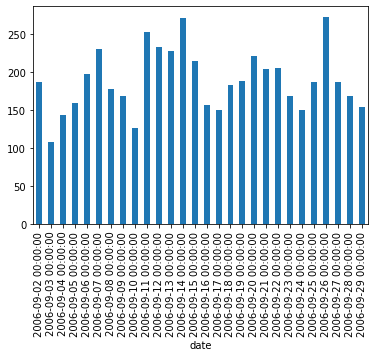

In [ ]:
target_months[target_months['date']>"2006-09-01"].groupby('date')['f'].count().plot(kind='bar')